## Ejemplo 1

### Librerias

In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib notebook
import glob ### Por si queremos hacer un list file
print(glob.glob("F:/Neoland/Data/Anova/*.csv"))


['F:/Neoland/Data/Anova\\Objeto.csv', 'F:/Neoland/Data/Anova\\Precio.csv', 'F:/Neoland/Data/Anova\\Tienda.csv']


Lectura de ficheros

In [2]:
Nombre = pd.read_csv("F:/Neoland/Data/Anova/Objeto.csv",delimiter=";")
Oficina = pd.read_csv("F:/Neoland/Data/Anova/Tienda.csv",delimiter=";")
Precio = pd.read_csv("F:/Neoland/Data/Anova/Precio.csv",delimiter=";",decimal=",")
df=Precio.merge(Oficina,  how='inner', left_on='Key_Tienda', right_on='Key_Tienda')
df=df.merge(Nombre,  how='inner', left_on='Key_Objeto', right_on='Key_Objeto')

In [3]:
df.shape

(151688, 6)

Eliminamos las llaves 

In [4]:
df=df.drop(['Key_Objeto','Key_Tienda'],axis=1)

In [5]:
df['Precio']=df['Precio'].abs()

In [6]:
df.groupby('Tienda')['Precio'].mean()

Tienda
Tienda_112    1027.116573
Tienda_302    1029.935518
Tienda_652    1017.887928
Tienda_732    1028.424813
Name: Precio, dtype: float64

### Histograma

In [7]:
Tienda1=df[df.Tienda=='Tienda_652']
Tienda2=df[df.Tienda=='Tienda_732']
Tienda3=df[df.Tienda=='Tienda_302']
Tienda4=df[df.Tienda=='Tienda_112']

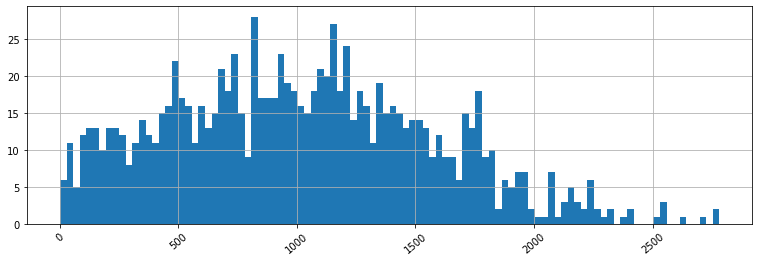

In [11]:
Tienda1['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=40)

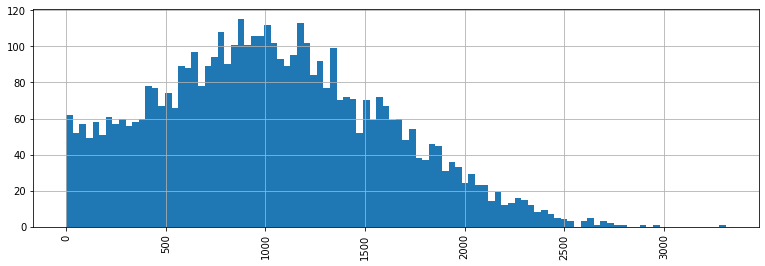

In [12]:
Tienda2['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=90)

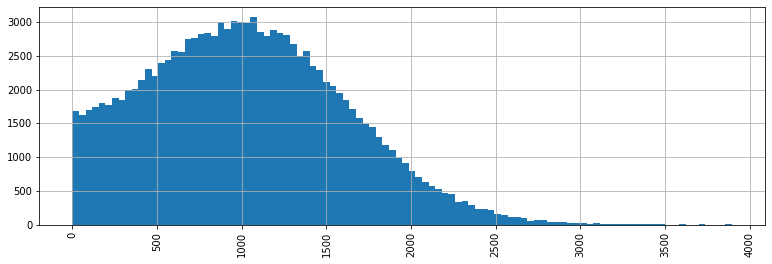

In [13]:
Tienda3['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=90)

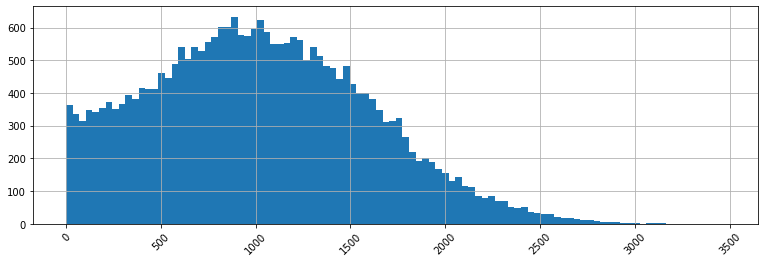

In [16]:
Tienda4['Precio'].hist(bins=100,figsize=(13,4),label='Recuento', xrot=45)

## Q-Q Plot

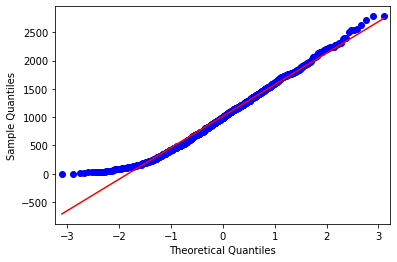

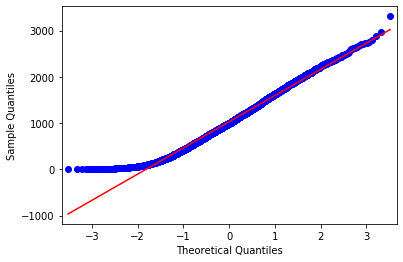

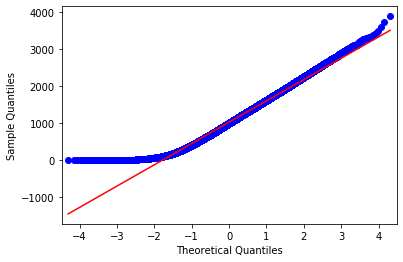

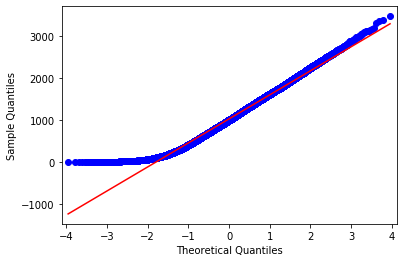

In [19]:
import statsmodels.api as sm
import pylab

sm.qqplot(Tienda1['Precio'],loc=4,scale=3,line='s')
sm.qqplot(Tienda2['Precio'],loc=4,scale=3,line='s')
sm.qqplot(Tienda3['Precio'],loc=4,scale=3,line='s')
sm.qqplot(Tienda4['Precio'],loc=4,scale=3,line='s')
pylab.show()

### Test D'Agostino $K^2$

$$\begin{array}{cl}
H_0: & \text{Los datos siguen una distribucion normal} \\
H_1: & \text{Los datos no siguen una distribucion normal}
\end{array}$$

In [20]:
from scipy.stats import normaltest

normaltest(Tienda1['Precio'])

NormaltestResult(statistic=26.68911675945268, pvalue=1.6015183984113112e-06)

### Kolmogorov-Smirnov

In [22]:
media_Tienda1, desviacion_Tienda1=stats.norm.fit(Tienda1['Precio'])

In [23]:
stats.kstest(Tienda1['Precio'],'norm',args=(media_Tienda1,desviacion_Tienda1))

KstestResult(statistic=0.038533611179990546, pvalue=0.08594452657718943)

### Anderson-Darling

In [29]:
anderson_tienda1=stats.anderson(Tienda1['Precio'],dist='norm')

In [31]:
for i in range(len(anderson_tienda1.critical_values)):
    sl, cv = anderson_tienda1.significance_level[i], anderson_tienda1.critical_values[i]
    if anderson_tienda1.statistic < cv:
        print('Los datos siguen una distribución Normal a un nivel de signifgicación de %.0f%%' %(sl))
    else:
        print('Los datos NO siguen una distribución Normal a un nivel de signifgicación de %.0f%%' %(sl))

Los datos NO siguen una distribución Normal a un nivel de signifgicación de 15%
Los datos NO siguen una distribución Normal a un nivel de signifgicación de 10%
Los datos NO siguen una distribución Normal a un nivel de signifgicación de 5%
Los datos NO siguen una distribución Normal a un nivel de signifgicación de 2%
Los datos NO siguen una distribución Normal a un nivel de signifgicación de 1%


No podríamos seguir haciendo test paramétricos ya que los datos no siguen una distribución normal.
Lo que haremos será borrar el abs utilizado en la limpieza de los datos